<a href="https://colab.research.google.com/github/Ireoguech/CognoRise-Infotech-Internship-Projects/blob/main/BigMart_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BigMart Sales Data Analysis Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('bigmart_data.csv')

In [ ]:
bigmart_data = pd.read_csv('bigmart_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


**Handling missing values**
Found in the Item_Weight and Outlet_Size columns

In [ ]:
bigmart_data['Item_Weight'] = bigmart_data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
bigmart_data['Outlet_Size'] = bigmart_data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

**Ensuring consistencies in the dataset** by replacing 'LF' and 'low fat' as 'Low Fat' and 'reg' with 'Regular' in the 'Item_Fat_Content'

In [ ]:
bigmart_data['Item_Fat_Content'] = bigmart_data['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

Handling Zero Values in Item_Visibility by replacing with its mean

In [ ]:
visibility_mean = bigmart_data['Item_Visibility'].mean()
bigmart_data['Item_Visibility'] = bigmart_data['Item_Visibility'].replace(0, visibility_mean)

In [ ]:
bigmart_data.shape

(8523, 12)

In [ ]:
bigmart_data.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
bigmart_data.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
bigmart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.070213,140.992782,1997.831867,2181.288914
std,4.232804,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.867061,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
bigmart_data['Item_MRP'] = bigmart_data['Item_MRP'].astype(int)
bigmart_data['Item_Visibility'] = bigmart_data['Item_Visibility'].astype(int)
bigmart_data['Item_Outlet_Sales'] = bigmart_data['Item_Outlet_Sales'].astype(int)


In [ ]:
bigmart_data.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,int64
Item_Type,object
Item_MRP,int64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
bigmart_data = bigmart_data.drop_duplicates()

In [ ]:
bigmart_data.shape

(8523, 12)

In [ ]:
bigmart_data.to_csv('cleaned_bigmart_data.csv', index=False)

**VISUALIZATION OF THE BIGMART SALES DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
!pip install textblob
from textblob import TextBlob

In [ ]:
df = pd.read_csv('cleaned_bigmart_data.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0,Dairy,249,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,Regular,0,Soft Drinks,48,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.50,Low Fat,0,Meat,141,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.20,Regular,0,Fruits and Vegetables,182,OUT010,1998,Small,Tier 3,Grocery Store,732
4,NCD19,8.93,Low Fat,0,Household,53,OUT013,1987,High,Tier 3,Supermarket Type1,994


 **Sales by Outlet Type**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

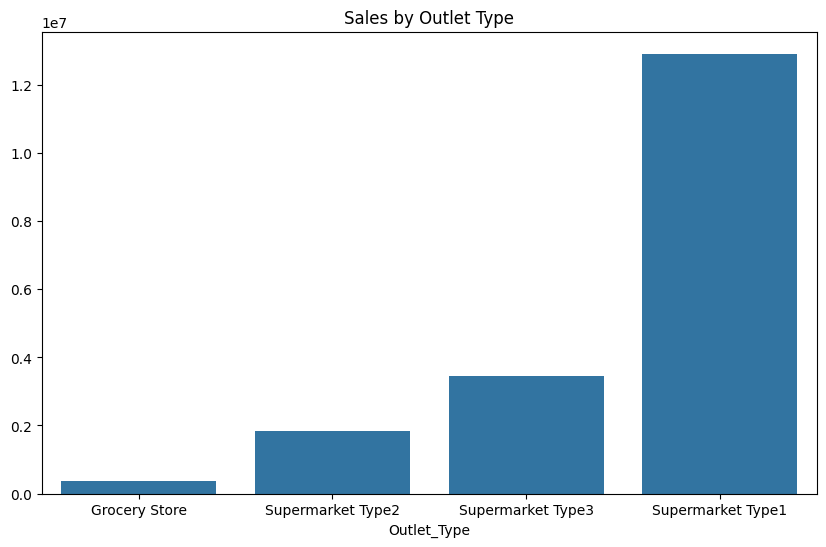

In [ ]:
sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_outlet_type.index, y=sales_by_outlet_type.values)
plt.title('Sales by Outlet Type')
plt

**Impact of Item MRP on Sales**

Note that MRP stands for Maximum Retail Price

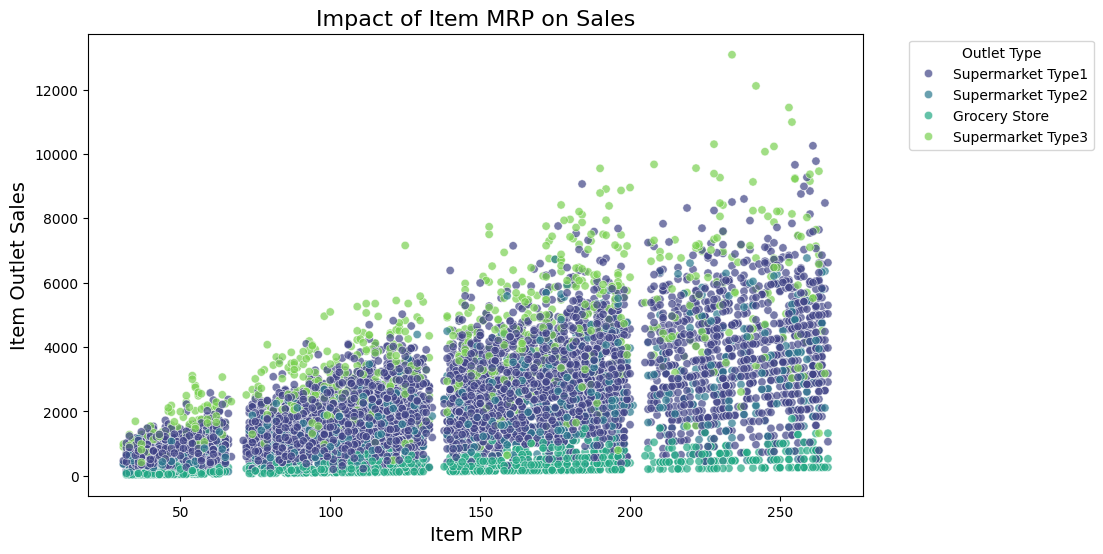

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Item_MRP'], y=df['Item_Outlet_Sales'], hue=df['Outlet_Type'], palette='viridis', alpha=0.7)
plt.title('Impact of Item MRP on Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.legend(title='Outlet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot illustrates the relationship between Item MRP and Item Outlet Sales.
There's no strong linear relationship between Item MRP and sales, but higher MRPs tend to have more scattered high sales, suggesting that while some high-MRP items sell well, others do not while Lower MRPs seem to have a more consistent but lower range of sales

Text(0, 0.5, 'Total Sales')

<Figure size 1000x600 with 0 Axes>

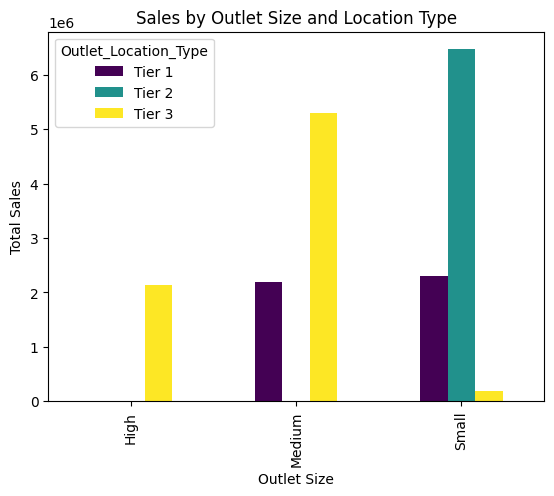

In [ ]:
grouped_sales = df.groupby(['Outlet_Size', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum().unstack()
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Sales by Outlet Size and Location Type')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

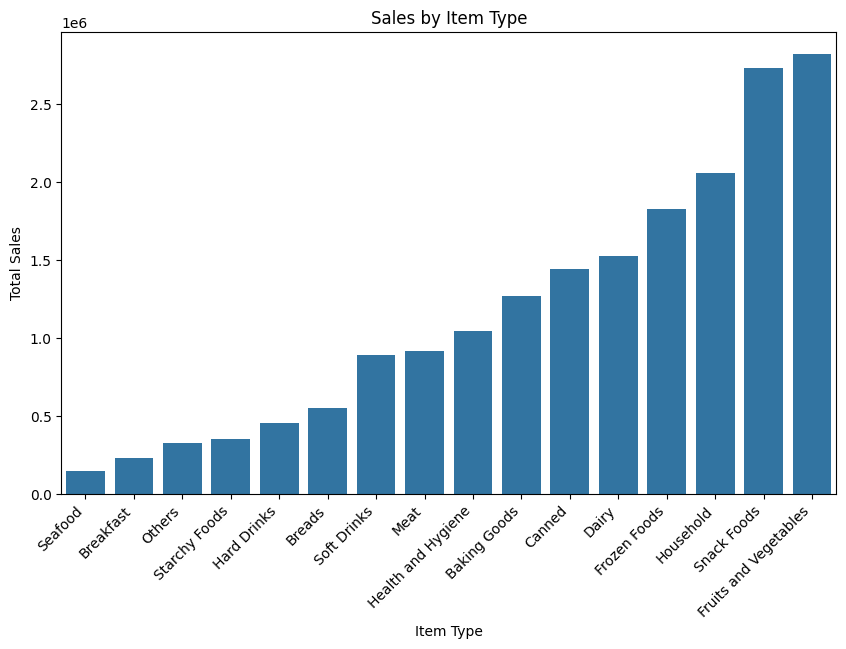

In [ ]:
sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_item_type.index, y=sales_by_item_type.values)
plt.title('Sales by Item Type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt

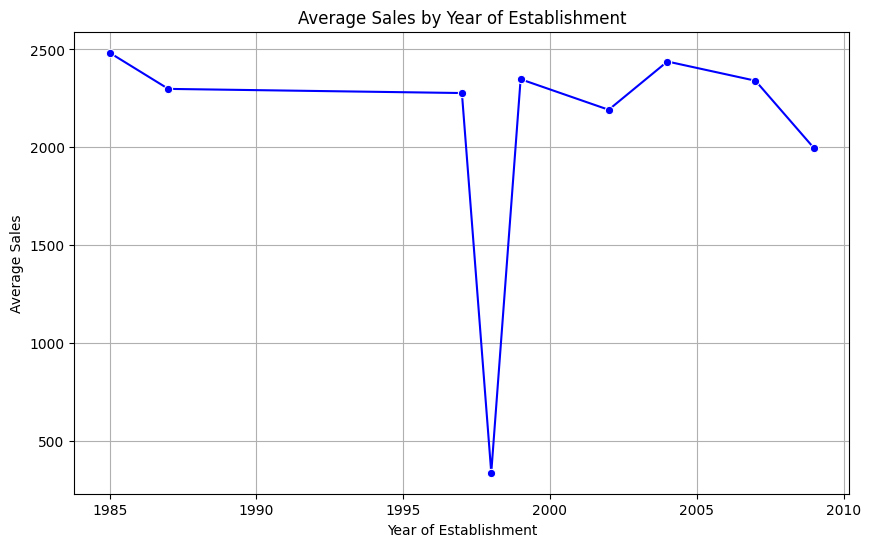

In [ ]:
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='o', color='b')
plt.title('Average Sales by Year of Establishment')
plt.xlabel('Year of Establishment')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

**CORRELATION ANALYSIS**

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

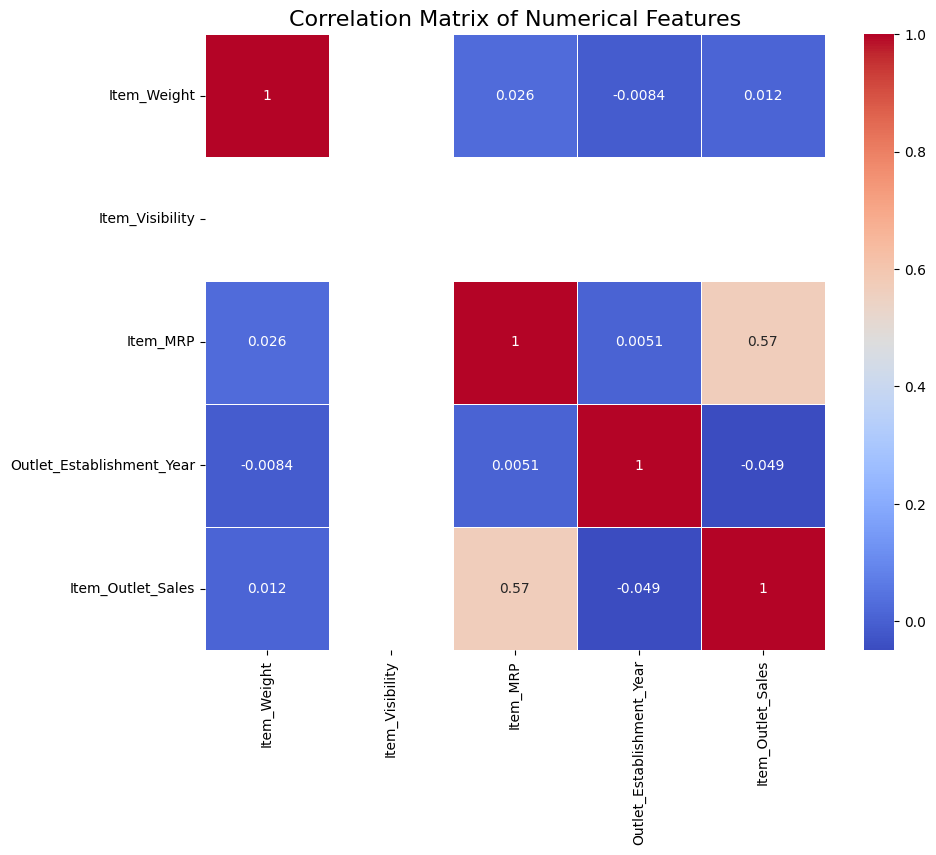

In [ ]:
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

Positive correlations are shown in shades of red, and negative correlations in shades of blue, with the intensity indicating the strength of the correlation.

In [ ]:
df['MRP_Binned'] = pd.cut(df['Item_MRP'],
                          bins=[0, 70, 140, 210],
                          labels=['Low', 'Medium', 'High'])
print(df['MRP_Binned'].value_counts())

MRP_Binned
High      3024
Medium    2819
Low       1341
Name: count, dtype: int64


In [ ]:
df['MRP_Outlet_Interaction'] = df['Item_MRP'] * df['Outlet_Type'].apply(lambda x: hash(x) % 10)

df[['Item_MRP', 'Outlet_Type', 'MRP_Outlet_Interaction']].head()

,Item_MRP,Outlet_Type,MRP_Outlet_Interaction
0,249,Supermarket Type1,747
1,48,Supermarket Type2,0
2,141,Supermarket Type1,423
3,182,Grocery Store,1638
4,53,Supermarket Type1,159


<ipython-input-33-d294f61795b9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mrp_sales = df.groupby('MRP_Binned')['Item_Outlet_Sales'].mean()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

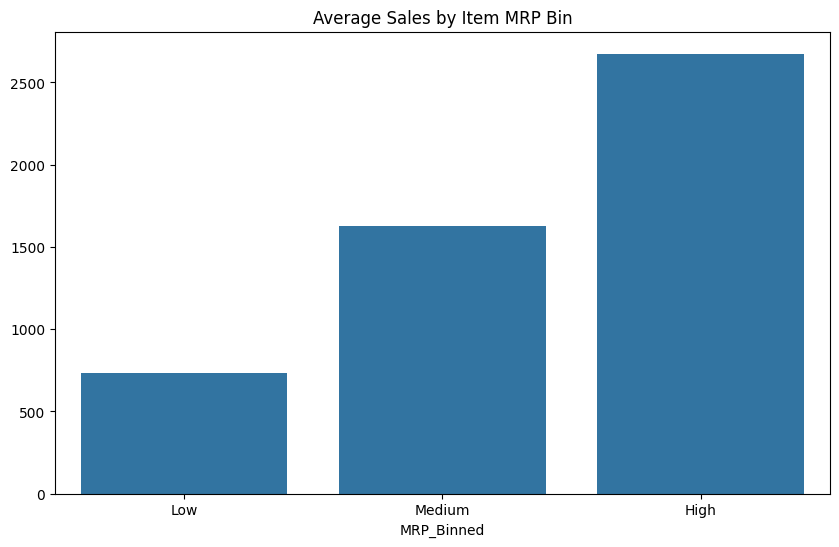

In [ ]:
mrp_sales = df.groupby('MRP_Binned')['Item_Outlet_Sales'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=mrp_sales.index, y=mrp_sales.values)
plt.title('Average Sales by Item MRP Bin')
plt


Text(0.5, 1.0, 'Average Sales by MRP-Outlet Interaction')

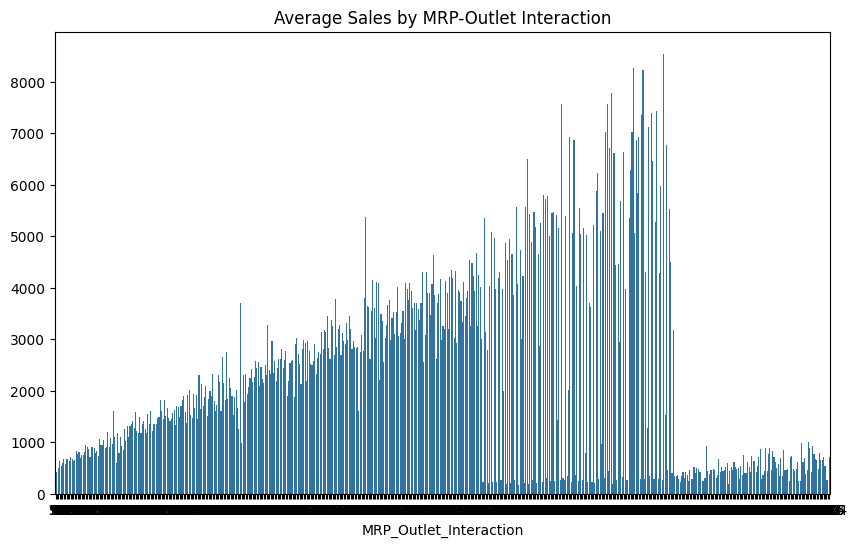

In [ ]:
interaction_sales = df.groupby('MRP_Outlet_Interaction')['Item_Outlet_Sales'].mean().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=interaction_sales.index, y=interaction_sales.values)
plt.title('Average Sales by MRP-Outlet Interaction')

**INSIGHTS**

*   Supermarket Type1 generates the highest sales, while Grocery Stores have the lowest sales.
*   There’s no strong linear relationship between MRP and sales indicating variability.
* Categorizing MRP into low, medium, and high price ranges reveals distinct sales patterns.
*   Different item types contribute differently to total sales.
*   The sales performance varies across different outlet sizes and locations.

**RECOMMENDATIONS**

*   Prioritize investments and marketing efforts for Supermarket Type1 outlets to maximize returns.
*   Reevaluate pricing strategies for high-priced items and consider targeted promotions to improve sales consistency.
*   Adjust pricing strategies and promotions based on the performance of each MRP category to optimize sales.
*   Focus on promoting and expanding high-performing item types to boost overall sales.
*   Customize inventory and marketing strategies based on outlet size and location to enhance sales.




